In [8]:
from pathlib import Path
import csv
path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)
for index, column_header in enumerate(header_row):
    print(index, column_header)

0 STATION
1 NAME
2 DATE
3 TMAX
4 TMIN
5 TOBS


## Error Checking
Running an error-checking code for when the values are being read from the CSV file to handle exceptions that might arise.

### Extracting Date and Temperature Data:
As each row is examined, the code attempts to extract the date, high temperature, and low temperature.

### Handling Missing Data:
In cases where any data is missing, Python raises a ValueError, and this is handled by printing an error message that includes the date of the missing data.

### Appending Valid Data:
If all data for a date is successfully retrieved without errors, the code proceeds to the else block, where the data is appended to the appropriate lists.

### Updating Title for New Location:
Since the code is plotting information for a new location, it updates the title to include the location on the plot and uses a smaller font size to accommodate the longer title.

### Effective Error Handling:
Running the script may reveal missing data for specific dates, and the error is handled appropriately. The code is still able to generate a plot, skipping over the missing data.

### Comparing Data:
Comparing the resulting graph to the Sitka graph, it becomes evident that Death Valley generally experiences warmer temperatures than southeast Alaska, as expected. Additionally, the temperature range each day in the desert is more extensive, which is emphasized by the height of the shaded region.

### Handling Data Anomalies:
Many datasets encounter issues such as missing, improperly formatted, or incorrect data. Various tools and techniques can be employed to address these situations.

### Using Try-Except-Else Block:
In this scenario, a try-except-else block is used to handle missing data gracefully.

### Ensuring Meaningful Visualization:
In data visualization, it's essential to use any suitable approach, such as continue to skip over data, remove() or del to eliminate data, as long as the result yields a meaningful and accurate visualization.

Missing data for 2021-05-04 00:00:00


C:\Users\Ayushi Tripathi\AppData\Local\Temp\ipykernel_8812\2567158148.py:27: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


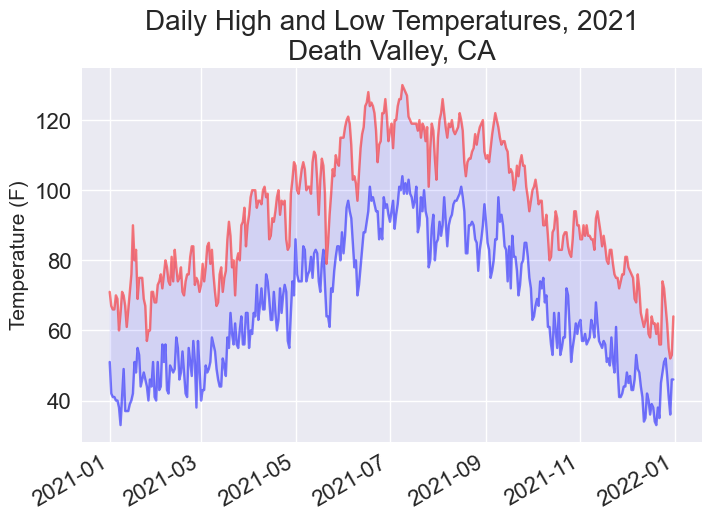

In [9]:
from pathlib import Path
import csv

from datetime import datetime
import matplotlib.pyplot as plt

path = Path('weather_data/death_valley_2021_simple.csv')
lines = path.read_text().splitlines()
reader = csv.reader(lines)
header_row = next(reader)

# Extract dates and high temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=20)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=15)
ax.tick_params(labelsize=16)
plt.show()